Ecole Normale Supérieure de l'Enseignement Technique - Mohammedia<br>
Master : Systèmes Distribués et Intelligence Artificielle<br>
Module : Machine Learning<br>
<b>IGUIDER Amine && Younnes Hassouni</b><br>
Année universitaire 2023 - 2024

# Wine Quality Prediction using Classification Model

<p>Wine Quality classification is a difficult piece of work since taste is the least factor of the human senses. A good wine quality prediction can be very useful in the certification process. This project aims to determine which features are the best quality of wine and generate insights into each of these attributes.</p>
<h1>Description of Dataset</h1>
<ol style="font-size:16px">The attributes that are involved in this dataset are : <br/><br/>
    <li><b>Fixed Acidity:</b> These are non-volatile acids that do not evaporate readily.</li>
<li><b>Volatile Acidity:</b> The amount of acetic acid present in the wine.</li>
<li><b>Citric Acid:</b> It adds ‘Freshness’ and flavor to wines.</li>
<li><b>Residual Sugar:</b> Amount of sugar left after fermentation.</li>
<li><b>Chlorides:</b> The amount of salt in the wine.</li>
<li><b>Free Sulfur Dioxide:</b> SO2 prevents microbial growth and the oxidation of wine.</li>
<li><b>Total sulfur Dioxide:</b> Total SO2 becomes evident in the nose and taste of wine.</li>
<li><b>Density:</b> The density of water depends on the percentage of alcohol and sugar content.</li>
<li><b>pH:</b> It describes the level of acidity on a scale from 0–14. Most wines are always between 3–4 on the pH scale.</li>
<li><b>Sulphates:</b> A wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant</li>
<li><b>Alcohol:</b> The percentage of alcohol content in the wine.</li>
<li><b>Quality:</b> which is the output variable/predictor.</li></ol>

# Exploratory Data Analysis (EDA) and Data Pre-processing

## Dependences

Here we can find the libraries we will use in order to develop a solution for this problem

<p><b>pandas:</b> Will help us treat the data.</p>
<p><b>matplotlib|seaborn:</b> Will help us plot the information so we can visualize it in different ways and have a better understanding of it.</p>
<p><b>sklearn:</b> Will provide all necessary tools to train our models and test them afterwards.</p>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Data Cleaning and Checking

In [37]:
data=pd.read_csv("winequality-red.csv",delimiter=';')

In [38]:
# Display the first few rows of the DataFrame
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [40]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [41]:
#Using isnull().sum() function we can find out the missing values in the data.
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis

The graphical representation of the data that provides the useful information to discover the patterns and insights of the data. Here in this wine data, various graphs are plotted to find the quality of the wine.

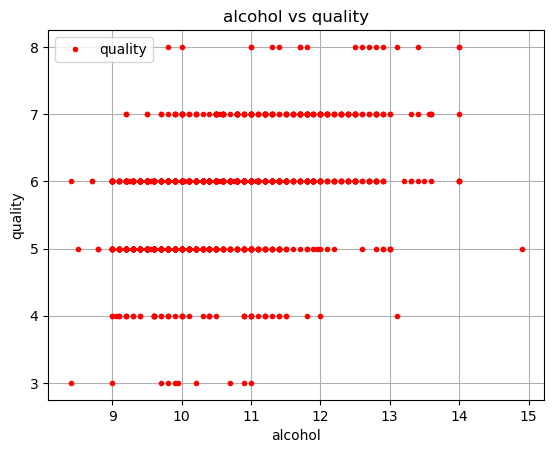

In [42]:
data.plot(x='alcohol',y='quality',style='.',color='r') 
plt.title('alcohol vs quality') 
plt.xlabel('alcohol') 
plt.ylabel('quality') 
plt.grid() 
plt.show()

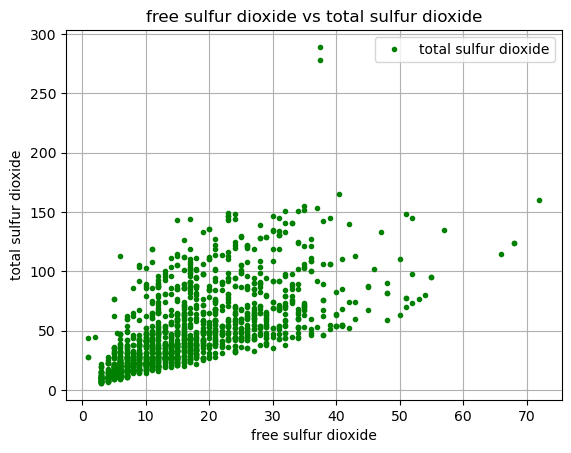

In [43]:
data.plot(x='free sulfur dioxide',y='total sulfur dioxide', style='.',color='g')
plt.title('free sulfur dioxide vs total sulfur dioxide')
plt.xlabel('free sulfur dioxide')
plt.ylabel('total sulfur dioxide')
plt.grid()
plt.show()

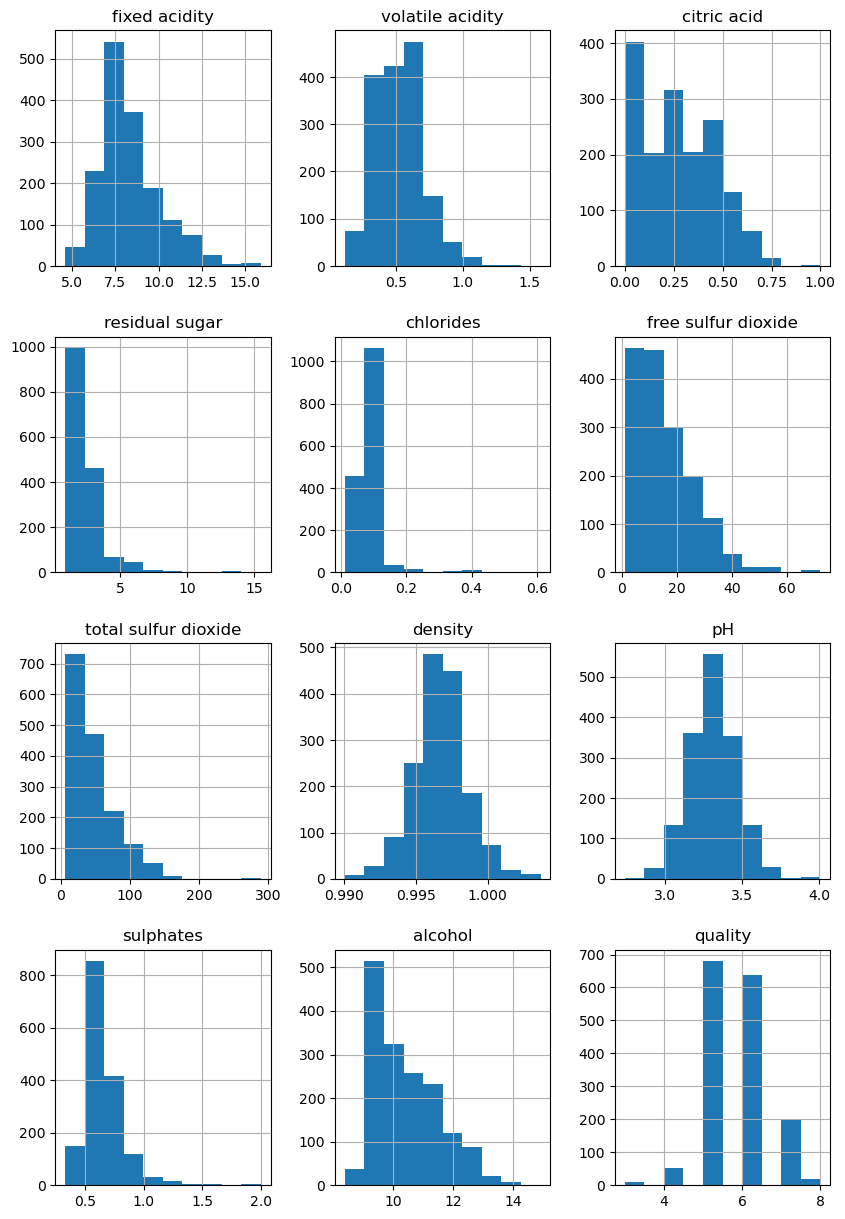

In [44]:
data.hist(figsize=(10,15))
plt.show()

C:\Users\T15\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


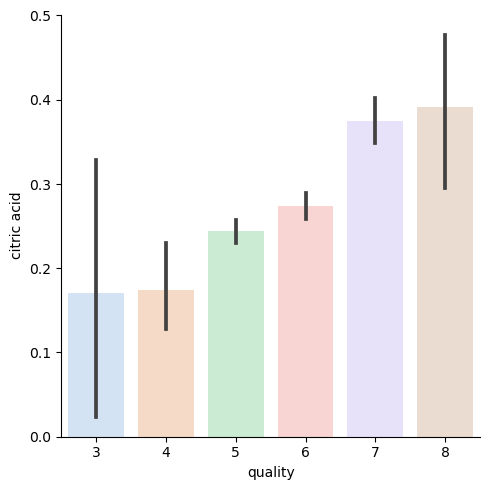

In [45]:
sb.catplot(data=data, kind="bar",x="quality",y="citric acid",palette="pastel",alpha=.5, height=5)

<Axes: xlabel='quality', ylabel='citric acid'>

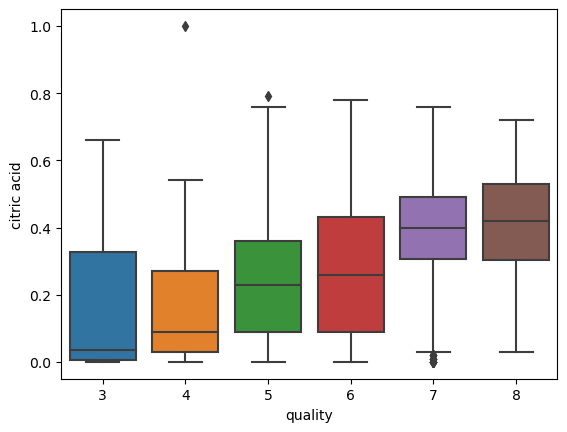

In [46]:
sb.boxplot(x="quality",y="citric acid",data=data)

<Axes: xlabel='quality', ylabel='fixed acidity'>

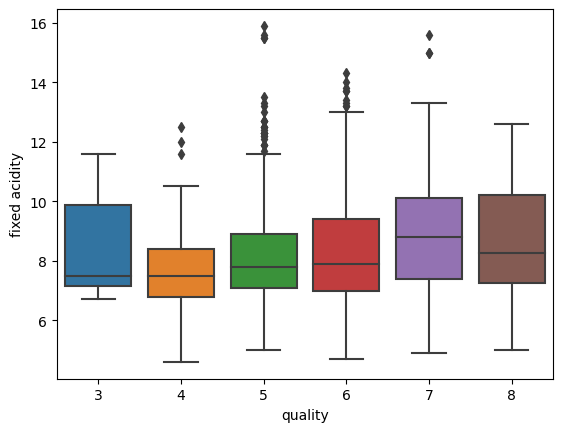

In [47]:
sb.boxplot(x="quality",y="fixed acidity",data=data)

## Correlation

In [48]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

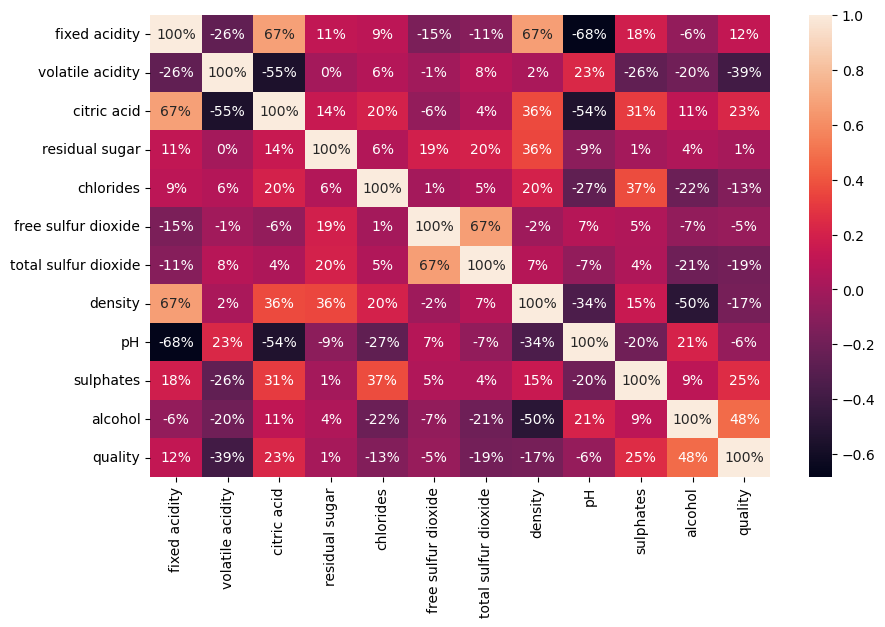

In [49]:
#Heatmap to plot all correlations between features
plt.figure(figsize=(10,6))
sb.heatmap(data.corr(), annot=True, fmt='.0%')

<p>
From this matrix we can observe, apart from the information we had before, some obvious feature correlations such as pH and acidity. Apart from that, we get to know the percentage of the correlations we obtained before. We can also observe that approximately half of these features correlate positively with quality while the other half correlate negatively.
</p>
<p>
From all these features, we are going to select the ones with bigger numbers since these are the ones that will give us more information. To do so we are going to stablish a minimum threshold of correlation approximately around 0.2 (absolut value) since we do not have to take into account features whose values might be redundant and not provide information at all.
</p>

In [50]:
correlations = data.corr()['quality'].sort_values(ascending=False)
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric acid              True
fixed acidity           False
residual sugar          False
free sulfur dioxide     False
pH                      False
chlorides               False
density                 False
total sulfur dioxide    False
volatile acidity         True
Name: quality, dtype: bool


<p>
From all the values, we are selecting alcohol, sulphates, citric_acid and volatile_acidity in order to study them better and see the distribution of values that separate the different qualities.
</p>

In [52]:
# X=data.drop(['quality','winequality'],axis = 1)
# y=data['winequality']
# data
#We separe our features from our target feature (quality) and we split data intro training and test
data['winequality']=[1 if x>=6 else 0 for x in data['quality']]
X = data.loc[:,['alcohol','sulphates','citric acid','volatile acidity']]
y = data['winequality']
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winequality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


## Splitting the Data

We use train_test_split() in sklearn model selection to split the data into two subsets-Training and Testing data. Here in this wine data, training is carried out with 80% and testing with 20%.

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Standardisation the data

StandardScaler is a preprocessing technique in machine learning used to standardize features by removing the mean and scaling to unit variance, ensuring that all features have the same scale.

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluating the Model

### Random Forest Classifier

<b>Random Forest Classifier</b> is the model used here to evaluate the performance of wine quality. Since Random Forest Classifier takes less training time and also it gives the output with high accuracy even for large dataset it is the efficient algorithm preferred among all the ML models

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import time

# Create a RandomForestClassifier
random_forest = RandomForestClassifier()

# Perform cross-validation
cv_scores_random_forest = cross_val_score(random_forest, X_train, y_train, cv=5)

# Start timing for training
start_train_time = time.time()

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Calculate the elapsed time for training in milliseconds
time_train_random_forest = (time.time() - start_train_time) * 1000

# Obtain the scores for both training and test sets
train_score_random_forest = random_forest.score(X_train, y_train)
test_score_random_forest = random_forest.score(X_test, y_test)

print('Cross-Validation Scores:', cv_scores_random_forest)
print('Mean CV Score:', cv_scores_random_forest.mean())
print('Training Score:', train_score_random_forest)
print('Test Score:', test_score_random_forest)

# Start timing for testing
start_test_time = time.time()

# Make predictions on the test set
predictions = random_forest.predict(X_test)

# Calculate the elapsed time for testing in milliseconds
time_test_random_forest = (time.time() - start_test_time) * 1000

# Generate classification report
print(classification_report(y_test, predictions))

# Print the elapsed time for training and testing in milliseconds
print("Training time (ms):", time_train_random_forest)
print("Testing time (ms):", time_test_random_forest)

Cross-Validation Scores: [0.765625   0.73046875 0.76171875 0.7734375  0.79215686]
Mean CV Score: 0.7646813725490196
Training Score: 0.9992181391712275
Test Score: 0.809375
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       148
           1       0.82      0.83      0.82       172

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320

Training time (ms): 958.7211608886719
Testing time (ms): 31.255722045898438


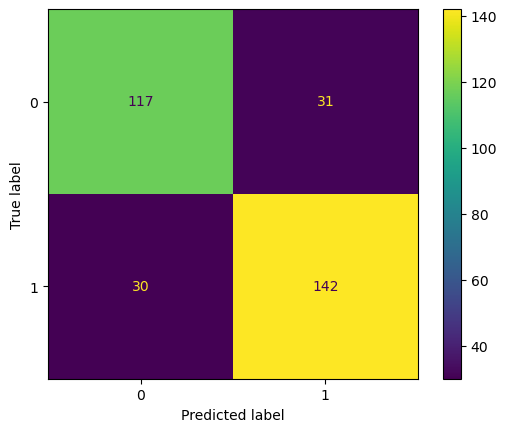

In [56]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test)# Displaying the confusion matrix for the classifier
plt.show()

In [57]:
data= {'Actual values': y_test,'predicted values': predictions}
pd.DataFrame(data)

,Actual values,predicted values
1109,1,1
1032,0,0
1002,1,1
487,1,0
979,0,0
...,...,...
794,1,1
813,0,1
1322,0,1
704,0,0


Finally we conclude that Almost all the predicted values are similar to the actual values. This model gives us the accuracy of 80%.A good wine quality is identified by its smell,taste,balance of its components. By predicting the quality of wine using ML technique we can help industries to certify the process of classifying whether it is good quality or bad quality of wine.

### Support Vector Machine (SVM):

Support Vector Machine is a powerful classification algorithm that is effective in high-dimensional spaces and works well with relatively small datasets. It's particularly useful when there's a clear margin of separation between classes.

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import time

# Create an SVM classifier
svm_classifier = SVC()

# Start timing for training
start_train_time = time.time()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Calculate the elapsed time for training in milliseconds
svm_train_time = (time.time() - start_train_time) * 1000

# Perform cross-validation
svm_cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)

# Obtain the scores for both training and test sets
train_score_svm_classifier = svm_classifier.score(X_train, y_train)
test_score_svm_classifier = svm_classifier.score(X_test, y_test)

# Print the cross-validation scores
print("Cross-Validation Scores:", svm_cv_scores)
print('Mean CV Score:', svm_cv_scores.mean())

print('Training Score:', train_score_svm_classifier)
print('Test Score:', test_score_svm_classifier)

# Start timing for testing
start_test_time = time.time()

# Make predictions
svm_predictions = svm_classifier.predict(X_test)

# Calculate the elapsed time for testing in milliseconds
svm_test_time = (time.time() - start_test_time) * 1000

# Classification report
print(classification_report(y_test, svm_predictions))

# Print the elapsed time for both training and testing in milliseconds
print("Training time (ms):", svm_train_time)
print("Testing time (ms):", svm_test_time)

Cross-Validation Scores: [0.72265625 0.6953125  0.69140625 0.72265625 0.71372549]
Mean CV Score: 0.7091513480392158
Training Score: 0.7099296325254105
Test Score: 0.70625
              precision    recall  f1-score   support

           0       0.66      0.76      0.71       148
           1       0.76      0.66      0.71       172

    accuracy                           0.71       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.71      0.71      0.71       320

Training time (ms): 120.26381492614746
Testing time (ms): 67.4738883972168


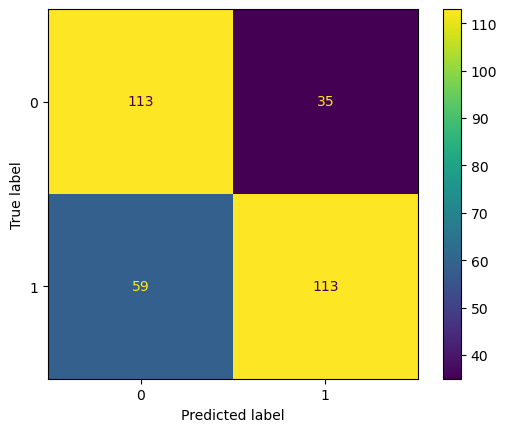

In [28]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test, y_test)# Displaying the confusion matrix for the classifier
plt.show()

In [29]:
data= {'Actual values': y_test,'predicted values': svm_predictions}
pd.DataFrame(data)

,Actual values,predicted values
1109,1,1
1032,0,0
1002,1,1
487,1,0
979,0,1
...,...,...
794,1,1
813,0,1
1322,0,1
704,0,0


## Gradient Boosting Classifier for binary classification

Gradient Boosting Classifier is a machine learning algorithm used for binary classification tasks. It sequentially builds a series of weak learners, each trying to correct the errors of its predecessor, resulting in a powerful ensemble model.

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import time

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Start timing for training
start_train_time = time.time()

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Calculate the elapsed time for training in milliseconds
gb_train_time = (time.time() - start_train_time) * 1000

# Perform cross-validation
cv_scores_gb_classifier = cross_val_score(gb_classifier, X_train, y_train, cv=5)

# Obtain the scores for both training and test sets
train_score_gb_classifier = gb_classifier.score(X_train, y_train)
test_score_gb_classifier = gb_classifier.score(X_test, y_test)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_gb_classifier)
print('Mean CV Score:', cv_scores_gb_classifier.mean())

print('Training Score:', train_score_gb_classifier)
print('Test Score:', test_score_gb_classifier)

# Start timing for testing
start_test_time = time.time()

# Make predictions
gb_predictions = gb_classifier.predict(X_test)

# Calculate the elapsed time for testing in milliseconds
gb_test_time = (time.time() - start_test_time) * 1000

# Classification report
print(classification_report(y_test, gb_predictions))

# Print the elapsed time for both training and testing in milliseconds
print("Training time (ms):", gb_train_time)
print("Testing time (ms):", gb_test_time)


Cross-Validation Scores: [0.75       0.72265625 0.734375   0.76171875 0.75686275]
Mean CV Score: 0.7451225490196078
Training Score: 0.8131352619233776
Test Score: 0.746875
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       148
           1       0.77      0.76      0.76       172

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

Training time (ms): 449.9506950378418
Testing time (ms): 10.036706924438477


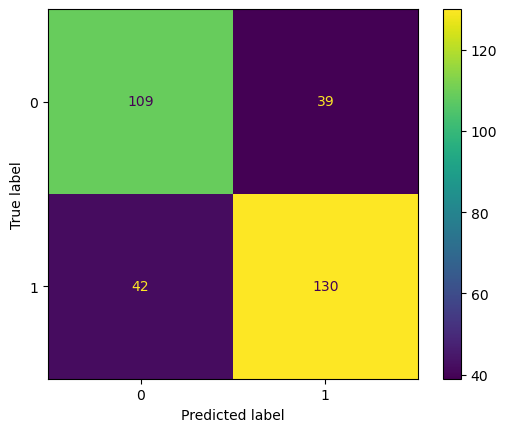

In [31]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_estimator(gb_classifier, X_test, y_test)# Displaying the confusion matrix for the classifier
plt.show()

In [32]:
data= {'Actual values': y_test,'predicted values': gb_predictions}
pd.DataFrame(data)

,Actual values,predicted values
1109,1,1
1032,0,0
1002,1,1
487,1,0
979,0,0
...,...,...
794,1,1
813,0,1
1322,0,1
704,0,0


## Decision Tree Classifier

A Decision Tree Classifier is a machine learning model that recursively divides the dataset into homogeneous subsets based on features, using decision rules based on the values of these features. It is used for classification and regression tasks in supervised learning.

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import time

# Create a DecisionTreeClassifier object
decision_tree = DecisionTreeClassifier()

# Start timing for training
start_train_time = time.time()

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Measure the training time
train_time_decision_tree = (time.time() - start_train_time) * 1000  # Convert to milliseconds

# Perform cross-validation
cv_scores_decision_tree = cross_val_score(decision_tree, X_train, y_train, cv=5)

# Obtain the scores for both training and test sets
train_score_decision_tree = decision_tree.score(X_train, y_train)
test_score_decision_tree = decision_tree.score(X_test, y_test)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_decision_tree)
print('Mean CV Score:', cv_scores_decision_tree.mean())

print('Training Score:', train_score_decision_tree)
print('Test Score:', test_score_decision_tree)


# Make predictions on the test set
start_test_time = time.time()
decision_tree_predictions = decision_tree.predict(X_test)
test_time_decision_tree = (time.time() - start_test_time) * 1000  # Convert to milliseconds

# Generate classification report
print(classification_report(y_test, decision_tree_predictions))

# Print the elapsed time for training and testing in milliseconds
print('Training Time:', train_time_decision_tree, 'ms')
print('Testing Time:', test_time_decision_tree, 'ms')

Cross-Validation Scores: [0.75       0.69140625 0.734375   0.7421875  0.76078431]
Mean CV Score: 0.735750612745098
Training Score: 0.9992181391712275
Test Score: 0.75
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       148
           1       0.77      0.77      0.77       172

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

Training Time: 14.701128005981445 ms
Testing Time: 0.0 ms


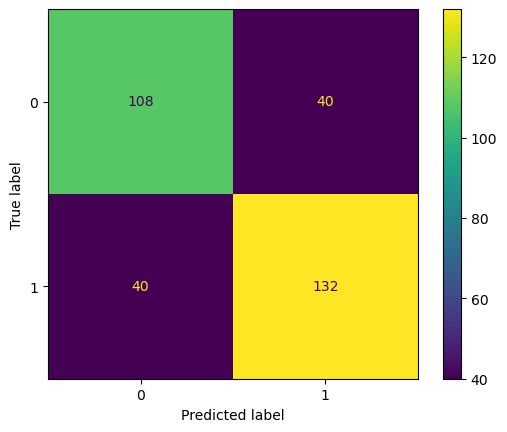

In [34]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test)# Displaying the confusion matrix for the classifier
plt.show()

In [35]:
data= {'Actual values': y_test,'predicted values': decision_tree_predictions}
pd.DataFrame(data)

,Actual values,predicted values
1109,1,1
1032,0,0
1002,1,1
487,1,0
979,0,0
...,...,...
794,1,1
813,0,0
1322,0,1
704,0,0


# Results of all models with all features :

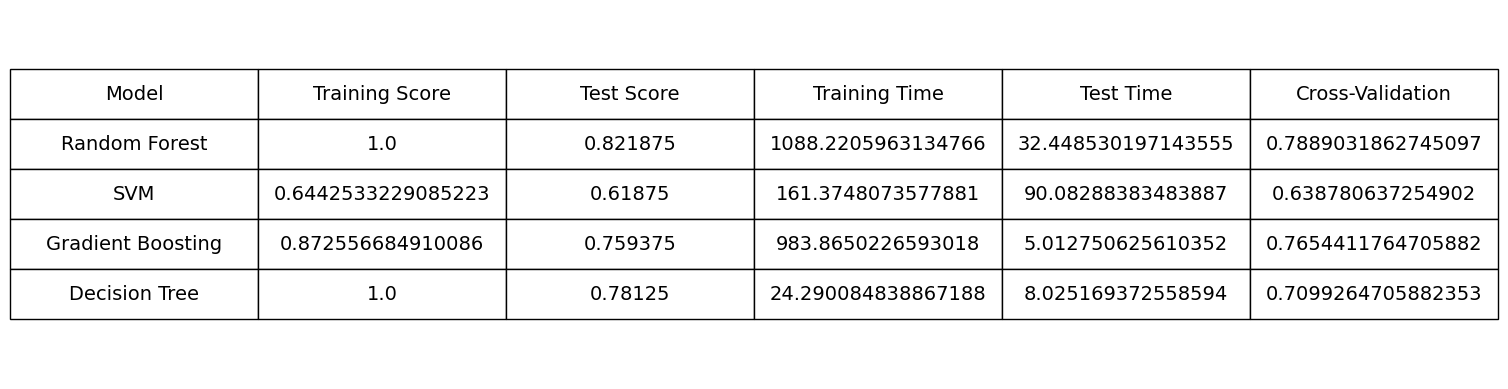

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data for three models
model_data = [
    {'Model': 'Random Forest', 'Training Score': train_score_random_forest, 'Test Score': test_score_random_forest, 'Training Time': time_train_random_forest, 'Test Time': time_test_random_forest,'Cross-Validation':cv_scores_random_forest.mean()},
    {'Model': 'SVM', 'Training Score': train_score_svm_classifier, 'Test Score': test_score_svm_classifier, 'Training Time': svm_train_time, 'Test Time': svm_test_time,'Cross-Validation':svm_cv_scores.mean()},
    {'Model': 'Gradient Boosting', 'Training Score': train_score_gb_classifier, 'Test Score': test_score_gb_classifier, 'Training Time': gb_train_time, 'Test Time': gb_test_time,'Cross-Validation':cv_scores_gb_classifier.mean()},
    {'Model': 'Decision Tree', 'Training Score': train_score_decision_tree, 'Test Score': test_score_decision_tree, 'Training Time': train_time_decision_tree, 'Test Time': test_time_decision_tree,'Cross-Validation':cv_scores_decision_tree.mean()}
]

# Create a DataFrame from the data
df = pd.DataFrame(model_data)

# Create a figure and an axis for the plot
fig, ax = plt.subplots()

# Hide axis labels and ticks
ax.axis('off')

# Create a table using the table method
table = plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Set table properties
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(3, 3)  # Adjust the table size if necessary

plt.show()

# Results of all models with 'alcohol','sulphates','citric acid','volatile acidity' :

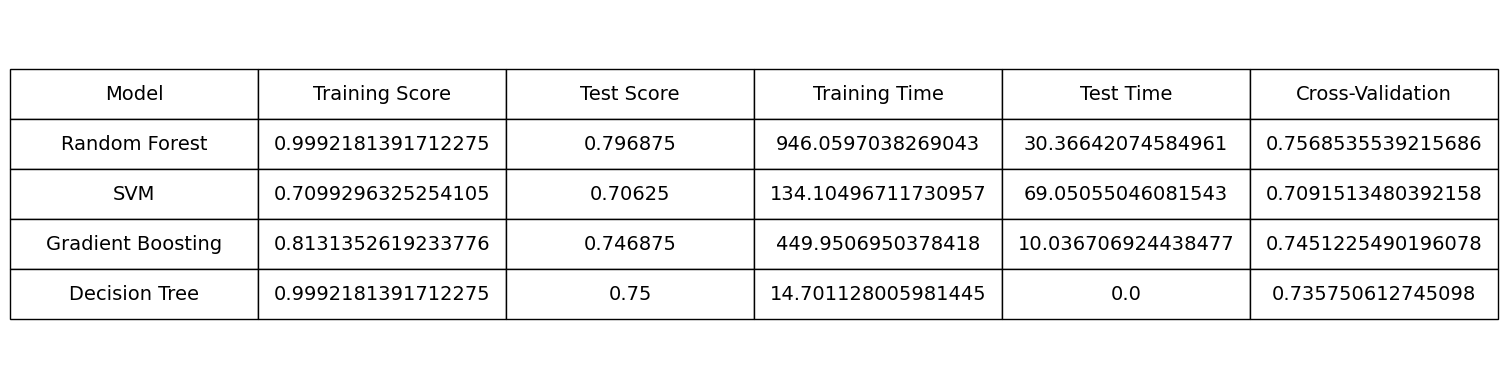

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data for three models
model_data = [
    {'Model': 'Random Forest', 'Training Score': train_score_random_forest, 'Test Score': test_score_random_forest, 'Training Time': time_train_random_forest, 'Test Time': time_test_random_forest,'Cross-Validation':cv_scores_random_forest.mean()},
    {'Model': 'SVM', 'Training Score': train_score_svm_classifier, 'Test Score': test_score_svm_classifier, 'Training Time': svm_train_time, 'Test Time': svm_test_time,'Cross-Validation':svm_cv_scores.mean()},
    {'Model': 'Gradient Boosting', 'Training Score': train_score_gb_classifier, 'Test Score': test_score_gb_classifier, 'Training Time': gb_train_time, 'Test Time': gb_test_time,'Cross-Validation':cv_scores_gb_classifier.mean()},
    {'Model': 'Decision Tree', 'Training Score': train_score_decision_tree, 'Test Score': test_score_decision_tree, 'Training Time': train_time_decision_tree, 'Test Time': test_time_decision_tree,'Cross-Validation':cv_scores_decision_tree.mean()}
]

# Create a DataFrame from the data
df = pd.DataFrame(model_data)

# Create a figure and an axis for the plot
fig, ax = plt.subplots()

# Hide axis labels and ticks
ax.axis('off')

# Create a table using the table method
table = plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Set table properties
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(3, 3)  # Adjust the table size if necessary

plt.show()

# Conclusions : 

<p>
After having obtained all the results through our models and plots, these are some things we can say about this problem and solution:
</p>
<ul>
<li>
From the very first moment we saw there weren't strong correlations between features and quality, that's why it's hard to make an accurate prediction using classification algorithms. That said, alcohol, sulphates, citric_acid features are the ones that correlate the most positively while volatile_acidity is the one correlating the most negatively.
</li>
<li>
SVM and Gradient Boosting seem to be the best-fitting models when solving this problem using classification.
</li>
</ul>